# Santander Value Prediction Challenge
### Predict the value of transactions for potential customers.

See everything about this challenge and download the dataset here -> https://www.kaggle.com/c/santander-value-prediction-challenge

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score, mean_squared_log_error

import os

from supervised.automl import AutoML

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Get Dataset

In [2]:
data_folder = os.path.join(os.getenv('HOME'), 'Downloads', 'santander-value-prediction-challenge')

train_df = pd.read_csv(os.path.join(data_folder, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_folder, 'test.csv'))
print(train_df.shape)
print(test_df.shape)

(4459, 4993)
(49342, 4992)


In [3]:
#find nas or null
print(train_df.isna().values.sum())
print(train_df.isnull().values.sum())
print(test_df.isna().values.sum())
print(test_df.isnull().values.sum())

0
0
0
0


In [4]:
train_df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [5]:
label = 'target'
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


### Data analysis

I now prefer to use autoviz to analyze datasets, create features and see their distributions against classification or regression targets

### Training

In [7]:
def root_mean_squared_log_error_metrics(y_true, y_pred, sample_weight=None):
    _ytrue = minmax_scale(y_true, feature_range=(0, 1))
    _ypred = minmax_scale(y_pred, feature_range=(0, 1))
    return mean_squared_log_error(_ytrue, _ypred, squared=True)


def regression_metrics(y_true, y_hat):
    print('MAE:', mean_absolute_error(y_true, y_hat))
    print('MAPE: ', mean_absolute_percentage_error(y_true, y_hat))
    print('MSE:', mean_squared_error(y_true, y_hat))
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_hat)))
    print('RMSLE:', root_mean_squared_log_error_metrics(y_true, y_hat))
    print('R2:', r2_score(y_true, y_hat))
    
    sns.displot(y_true - y_hat, kde=True)

In [8]:
X_train = train_df.drop(columns=[label, 'ID'], axis=1)
y_train = train_df[label]

In [9]:
automl = AutoML(mode="Perform", 
                ml_task='regression',
                # eval_metric=root_mean_squared_log_error_metrics,
                eval_metric='mape',
                random_state=32,
                total_time_limit = 5 * 60 * 60)
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is regression with evaluation metric mape
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM mape 7.955507 trained in 3238.07 seconds (1-sample predict time 2.761 seconds)
2_Default_Xgboost mape 13.194895 trained in 3032.86 seconds (1-sample predict time 2.7043 seconds)
* Step not_so_random will try to check up to 20 models
7_LightGBM mape 8.536279 trained in 3119.05 seconds (1-sample predict time 2.8119 seconds)
3_Xgboost mape 13.79004 trained in 3021.68 seconds (1-sample predict time 2.7457 seconds)
Skip golde

AutoML(eval_metric='mape', ml_task='regression', mode='Perform',
       random_state=32, total_time_limit=18000)

In [10]:
automl.get_leaderboard().sort_values(by=['metric_value', 'single_prediction_time'])

,name,model_type,metric_type,metric_value,train_time,single_prediction_time
0,1_Default_LightGBM,LightGBM,mape,7.955507,3238.55,2.7610
4,8_LightGBM,LightGBM,mape,8.074695,3181.34,2.7965
2,7_LightGBM,LightGBM,mape,8.536279,3119.48,2.8119
1,2_Default_Xgboost,Xgboost,mape,13.194895,3033.26,2.7043
3,3_Xgboost,Xgboost,mape,13.790040,3022.13,2.7457


In [11]:
predictions = automl.predict(X_train)

MAE: 3098195.2001120164
MAPE:  5.8033052998083345
MSE: 20625623660937.668
RMSE: 4541544.193436597
RMSLE: 0.00722878507631097
R2: 0.6957364605384597


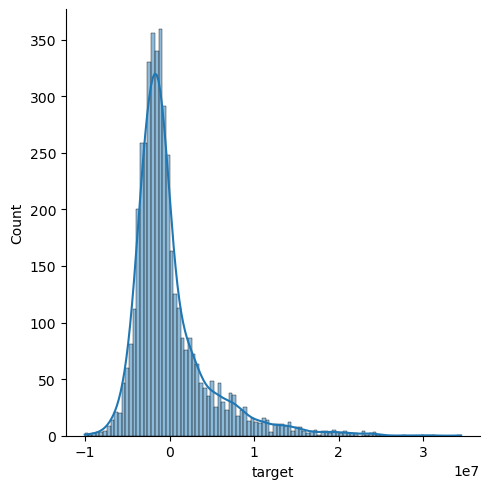

In [12]:
regression_metrics(y_train, predictions)

### On test dataset

In [14]:
y_test_hat = automl.predict(test_df.drop(columns=['ID']))
submission = pd.DataFrame({
    'ID' : test_df['ID'],
    'y' :  y_test_hat
})

In [15]:
submission.head(20)

,ID,y
0,000137c73,6.106229e+06
1,00021489f,4.176293e+06
2,0004d7953,5.803632e+06
3,00056a333,1.201739e+07
4,00056d8eb,4.129075e+06
5,0005fc190,3.825953e+06
6,000787e86,9.083459e+06
7,0008510a0,4.088665e+06
8,000895faf,4.111042e+06
9,000986fba,8.612104e+06


### Report

In [16]:
automl.report()

Best model,name,model_type,metric_type,metric_value,train_time,single_prediction_time
the best,1_Default_LightGBM,LightGBM,mape,7.95551,3238.55,2.761
,2_Default_Xgboost,Xgboost,mape,13.1949,3033.26,2.7043
,7_LightGBM,LightGBM,mape,8.53628,3119.48,2.8119
,3_Xgboost,Xgboost,mape,13.79,3022.13,2.7457
,8_LightGBM,LightGBM,mape,8.0747,3181.34,2.7965
